## Import Libraries

In [1]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

## Download MNIST dataset

In [2]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

In [3]:
X_train

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [4]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

## Numpy array to Img

In [5]:
import matplotlib.pyplot as plt

In [6]:
import numpy as np

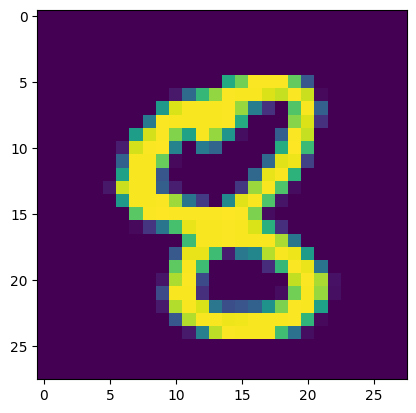

In [7]:
i = np.random.randint(0, 60000)
plt.imshow(X_train[i])

## Create the ANN model

### Normalize the data

In [8]:

X_train = X_train/255
X_test = X_test/255

### Flatten the data

In [9]:
from tensorflow.keras.layers import Flatten

In [10]:
model = Sequential()

# Input layer
model.add(Flatten(input_shape=(28, 28)))

# Hidden layer
model.add(Dense(128, activation='relu'))
# Output layer

model.add(Dense(10, activation='softmax'))

/opt/anaconda3/envs/tf/lib/python3.12/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [11]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

In [12]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])

In [13]:
history = model.fit(X_train, y_train, epochs=10, validation_split=0.2)

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8625 - loss: 0.4777 - val_accuracy: 0.9530 - val_loss: 0.1599
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 963us/step - accuracy: 0.9607 - loss: 0.1356 - val_accuracy: 0.9686 - val_loss: 0.1079
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 966us/step - accuracy: 0.9728 - loss: 0.0931 - val_accuracy: 0.9712 - val_loss: 0.0951
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 966us/step - accuracy: 0.9806 - loss: 0.0654 - val_accuracy: 0.9712 - val_loss: 0.0953
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 998us/step - accuracy: 0.9866 - loss: 0.0464 - val_accuracy: 0.9734 - val_loss: 0.0867
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 976us/step - accuracy: 0.9888 - loss: 0.0364 - val_accuracy: 0.9747 - val_loss: 0.0874
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 969us/step - accuracy: 0.9906 - loss: 0.0307 - val_accuracy: 0.9752 - val_loss: 0.0878
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 959us/step - accuracy: 0.9941 - l

## Plot

In [14]:
import matplotlib.pyplot as plt

In [19]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

In [23]:
history_dict = history.history

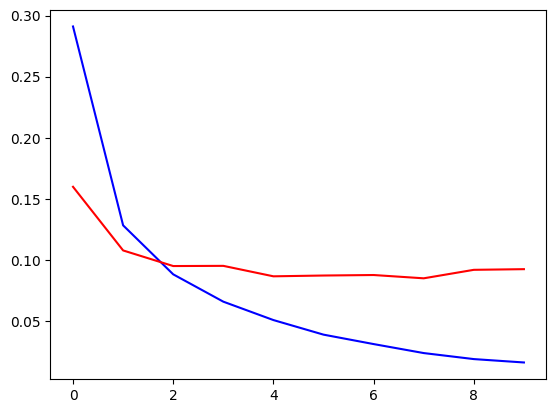

In [30]:
plt.plot(history_dict['loss'], color='blue')
plt.plot(history_dict['val_loss'], color='red')

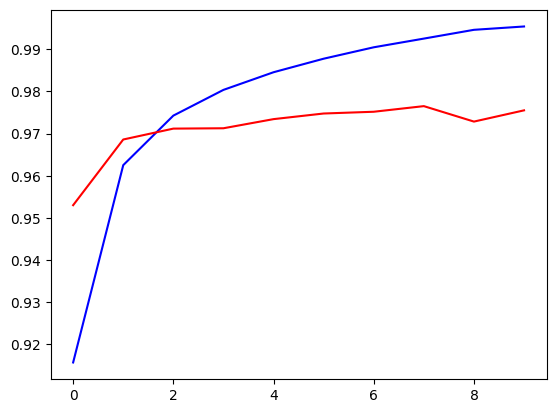

In [32]:
plt.plot(history_dict['accuracy'], color='blue')
plt.plot(history_dict['val_accuracy'], color='red')

## Test accuracy

In [37]:
y_prob = model.predict(X_test)
y_pred = y_prob.argmax(axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 321us/step


In [39]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.9782

## See the Results

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
8


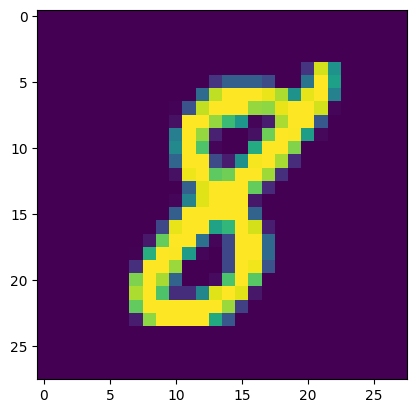

In [70]:
i = np.random.randint(1, 10000)
plt.imshow(X_test[i])
ans = model.predict(X_test[i].reshape(1, 28, 28)).argmax(axis=1)[0]
print(ans)